In [1]:
import numpy as np
import scipy.signal as signal
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare, chi2, f, multivariate_normal
from IPython.display import display, Math, Latex

try:
    from plotly.offline import init_notebook_mode, iplot
    import plotly.express as px
    import plotly.graph_objects as go
    init_notebook_mode(connected=True)
    
except:
    print('PLOT MUITO FEIO ON')

In [2]:
go=iplot

# Definição de bases

In [3]:
temp_min=0 #segundos
temp_max=4 #segundos
intervalo=1/2000 #segundos
fs=1/intervalo
time=np.linspace(temp_min, temp_max, int((temp_max-temp_min)*fs), endpoint=False)

# Função Sinais base

In [4]:
def sinal(amplitude, Freq, t=time):#potencia 1
    print('minha amplitude total foi %s'%amplitude)
    return amplitude, amplitude*np.sin(2*np.pi*Freq*t)

def ruido( media=0, variancia=1, t=time):#potencia 1
    print('minha amplitude de variancia total foi %s'%1)
    return 1, np.random.normal(media, variancia, len(t))

def coerencia(x, y, fs=fs):
    
    f, Pxy =signal.csd(x, y, fs)
    f, Pxx = signal.welch(x, fs)
    f, Pyy = signal.welch(y, fs)
    angle = np.angle(Pxy, deg=True)
    #
    
    return f, Pxy, abs(Pxy)**2/(Pxx*Pyy), abs(Pxy)/np.sqrt(Pxx*Pyy), angle
    
    
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

def autocorr(x, y=None, norm=False, fs=fs):
    if y is None:
        y=x
        cor=signal.correlate(x, x)/(fs)#, mode='full')
        cor=cor#[int(len(cor)/2)::]
    else:
        cor=signal.correlate(x, y)/(fs)#, mode='full')
        
    if norm:
        return range(-len(x)+1, len(y)), cor/np.sqrt(np.dot(x, x) * np.dot(y, y))
    else:
        print()
        return range(-len(x)+1, len(y)), cor
    
def plote2(name, x, y, intervalo=intervalo, time=time, fs=fs):

    print('potencia base', np.mean(x**2))
    print('potencia ruido', np.mean(y**2))
    z=x+y
    print('potencia total', np.mean(z**2))

    fbase, Pxy, moduloquadrado, modulo, angle = coerencia(x, y, fs)
    lags, auto=autocorr(x, y, norm=False)
    
    try:
        
        #bins = 0.5 * (bins[:-1] + bins[1:])
        fig=go.Figure(data=[go.Scatter(name='Sinal1', x=time, y=x), go.Scatter(name='Sinal2', x=time, y=y)])

        fig.update_layout(
            title='Valor natural (QA.1) do '+name,
            xaxis_title="Dominio [S]",
            yaxis_title="Amplitude",
            legend_title="Sinais",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))

        fig.show()


        fig=go.Figure(data=go.Scatter(x=[idx for idx in lags], y=auto))

        fig.update_layout(
            title='Valor da auto correlação (QB) do '+name,
            xaxis_title="Delta da correlação [S]",
            yaxis_title="Amplitude",
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))

        fig.show()  
        
        fig = go.Figure()

        fig.add_trace(go.Scatter(name="histogram_line", x=fbase, y=abs(Pxy)))
        fig.add_trace(go.Bar(name="histogram_bar", x=fbase, y=abs(Pxy)))

        fig.update_layout(
            title='Densidade do potencia (QC) do '+name,
            xaxis_title="Frequency [Hz]",
            yaxis_title="PSD [V**2/Hz] dB",
            yaxis= {'type': 'log'},
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))
        fig.show()
        
        fig = go.Figure()

        f, moduloquadrado=signal.coherence(x, y, fs, nperseg=1000, noverlap=True)
        
        fig.add_trace(go.Scatter(name="histogram_line", x=f, y=moduloquadrado))
        fig.add_trace(go.Bar(name="histogram_bar", x=f, y=moduloquadrado))

        fig.update_layout(
            title='Coerencia cruzada do (modulo quadrado) '+name,
            xaxis_title="Frequency [Hz]",
            yaxis_title="Magnitude da coerencia^2",
            #yaxis= {'type': 'log'},
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))
        fig.show()
        
        fig = go.Figure()

        fig.add_trace(go.Scatter(name="histogram_line", x=fbase, y=modulo))
        fig.add_trace(go.Bar(name="histogram_bar", x=fbase, y=modulo))

        fig.update_layout(
            title='Coerencia cruzada do (modulo) '+name,
            xaxis_title="Frequency [Hz]",
            yaxis_title="|Magnitude da coerencia|",
            #yaxis= {'type': 'log'},
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))
        fig.show()
        
               
        fig = go.Figure()

        fig.add_trace(go.Scatter(name="histogram_line", x=fbase, y=angle))
        fig.add_trace(go.Bar(name="histogram_bar", x=fbase, y=angle))

        fig.update_layout(
            title='Coerencia cruzada do (angulo) '+name,
            xaxis_title="Frequency [Hz]",
            yaxis_title="Atraso de fase [deg]",
            #yaxis= {'type': 'log'},
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))
        fig.show()
        
    except:
        _=plt.plot(time, x)
        _=plt.plot(time, y)
        plt.xlabel('Tempo [S]')
        plt.ylabel('Amplitude')
        plt.show()

        _=plt.plot(lags, auto)
        plt.xlabel('Diff de tempo [S]')
        plt.ylabel('Amplitude')
        plt.show()   
        
        plt.semilogy(fbase, abs(Pxy))
        plt.ylim([1e-7, 1e2])
        plt.xlabel('frequency [Hz]')
        plt.ylabel('PSD [V**2/Hz] dB')
        plt.show()

        _=plt.plot(fbase, moduloquadrado)
        plt.xlabel('frequency [Hz]')
        plt.ylabel('Amplitude, moduloquadrado')
        plt.show()
        
        _=plt.plot(fbase, modulo)
        plt.xlabel('frequency [Hz]')
        plt.ylabel('Amplitude, moduloquadrado')
        plt.show()
        
        _=plt.plot(fbase, angle)
        plt.xlabel('frequency [Hz]')
        plt.ylabel('Amplitude, moduloquadrado')
        plt.show()    
        

def plote(name, x, y=None, intervalo=intervalo, time=time, fs=fs):
    
    
    if y is not None:
        print('potencia base', np.mean(x**2))
        print('potencia ruido', np.mean(y**2))
        z=x+y
        print('potencia total', np.mean(z**2))
    else:
        z=x
        print('potencia total', np.mean(x**2))
        
    counts, bins = np.histogram(z, bins='auto', normed=True)#, bins=len(time)
    f, P_den =signal.periodogram(z, fs)
    lags, auto=autocorr(z, norm=False)
    
    try:
        
        #bins = 0.5 * (bins[:-1] + bins[1:])
        fig=go.Figure(data=go.Scatter(x=time, y=z))

        fig.update_layout(
            title='Valor natural (QA.1) do '+name,
            xaxis_title="Dominio [S]",
            yaxis_title="Amplitude",
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))

        fig.show()

        fig = go.Figure()

        fig.add_trace(go.Scatter(name="histogram_line", x=bins, y=counts))
        fig.add_trace(go.Bar(name="histogram_bar", x=bins, y=counts))
        
        fig.update_layout(
            title='Histograma (QA.2) do  '+name,
            xaxis_title="Amplitude",
            yaxis_title="densidade de probabilidade",
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))
        fig.show()

        fig=go.Figure(data=go.Scatter(x=[idx for idx in lags], y=auto))

        fig.update_layout(
            title='Valor da auto correlação (QB) do '+name,
            xaxis_title="Delta da correlação [S]",
            yaxis_title="Amplitude",
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))

        fig.show()  
        
        fig = go.Figure()

        fig.add_trace(go.Scatter(name="histogram_line", x=f, y=abs(P_den)))
        fig.add_trace(go.Bar(name="histogram_bar", x=f, y=abs(P_den)))

        fig.update_layout(
            title='Densidade do potencia (QC) do '+name,
            xaxis_title="Frequency [Hz]",
            yaxis_title="PSD [V**2/Hz] dB",
            yaxis= {'type': 'log'},
            legend_title="tipos de plotes",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"
            ))
        fig.show()

    except:
        _=plt.plot(time, z)
        plt.xlabel('Tempo [S]')
        plt.ylabel('Amplitude')
        plt.show()
        _=plt.hist(z, density=True, facecolor='g', alpha=0.75)
        plt.show()

        plt.semilogy(f, P_den)
        plt.ylim([1e-7, 1e2])
        plt.xlabel('frequency [Hz]')
        plt.ylabel('PSD [V**2/Hz] dB')
        plt.show()

        _=plt.plot(lags, auto)
        plt.xlabel('Diff de tempo [S]')
        plt.ylabel('Amplitude')
        plt.show()     

# (A) Análise da amplitude de Processos Estocásticos (E.S.A)

# A- x = A sen (2 п f t);

minha amplitude total foi 2
potencia total 2.0



<ipython-input-4-155d22458db3>:205: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



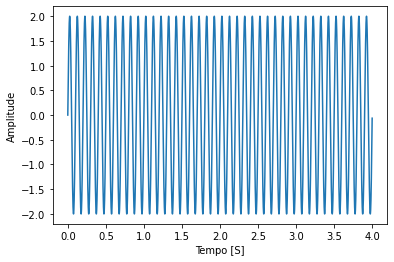

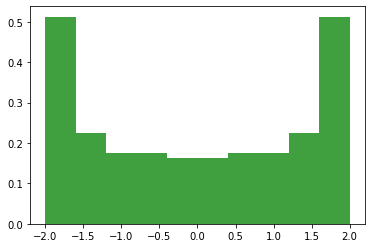

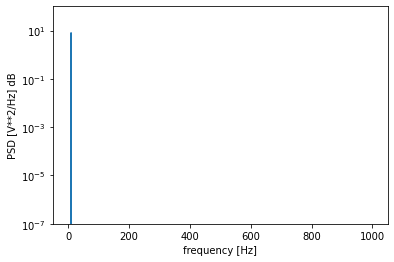

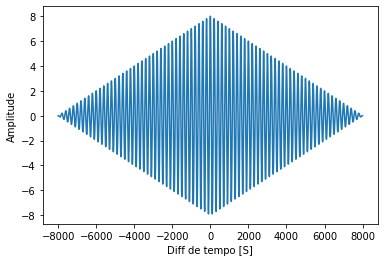

In [5]:
freq=10
amp=2
amp, func=sinal(amp, freq, t=time)
plote(str(round(amp, 3))+'*seno(0,1)', x=func, y=None, intervalo=intervalo, time=time)

# B- y ⁓ η; onde η é um ruído branco gaussiano (média=0, Variância=1);

minha amplitude de variancia total foi 1
potencia total 1.026998882623001



<ipython-input-4-155d22458db3>:205: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



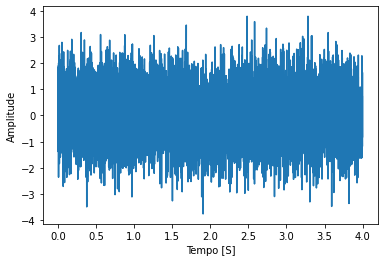

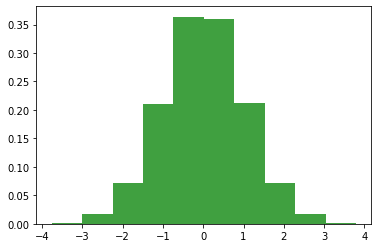

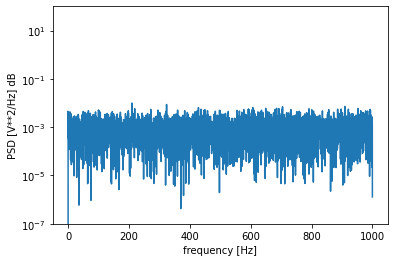

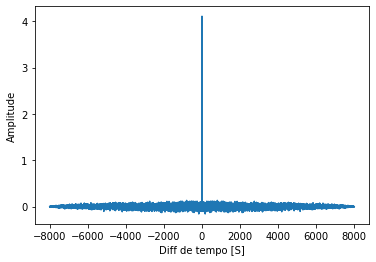

In [6]:
amp, func=ruido()
plote(str(round(amp, 3))+'*gaussiana(0,1)', x=func, y=None, intervalo=intervalo, time=time)

# C- Sinal + Ruido com 6 db

minha amplitude total foi 2.8284271247461903
minha amplitude de variancia total foi 1
potencia base 4.000000000000001
potencia ruido 1.0164582596398142
potencia total 5.080430483503658



<ipython-input-4-155d22458db3>:205: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



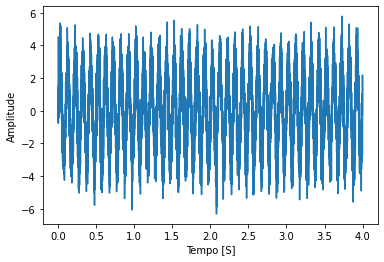

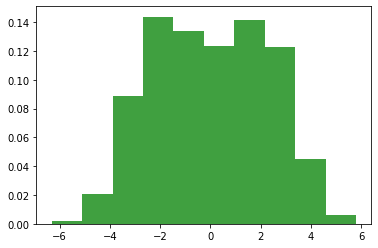

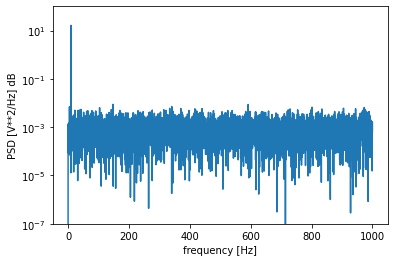

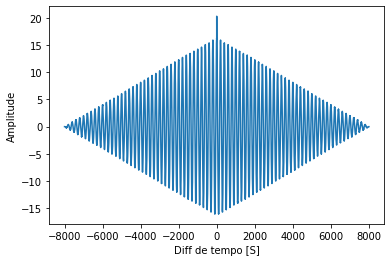

In [7]:
amp=np.sqrt(8)
freq=10
amp1, func1=sinal(amp, freq, time)
amp2, func2=ruido()
plote(str(round(amp1, 3))+'*seno(2*pi*'+str(freq)+'*t)+'+str(round(amp2, 3))+'*gaussiana(0,1)', func1, func2, intervalo=intervalo, time=time)

# D- Sinal + Ruido com -6 db

minha amplitude total foi 0.7071067811865475
minha amplitude de variancia total foi 1
potencia base 0.24999999999999994
potencia ruido 0.9871918823207243
potencia total 1.2213143885483793



<ipython-input-4-155d22458db3>:205: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



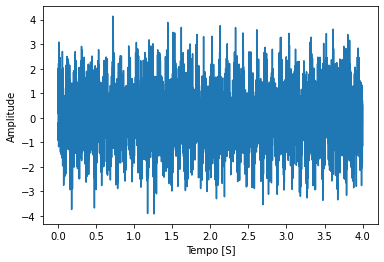

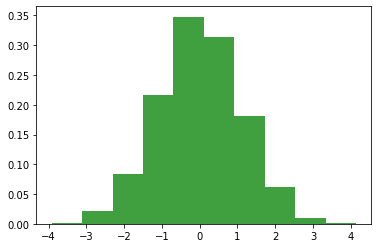

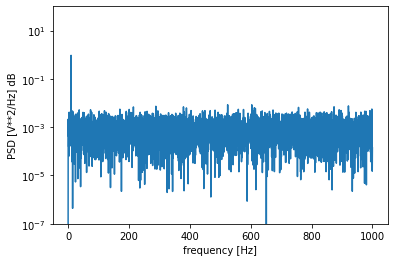

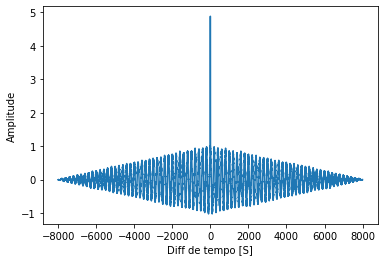

In [8]:
amp=1/np.sqrt(2)
freq=10
amp1, func1=sinal(amp, freq, time)
amp2, func2=ruido()
plote(str(round(amp1, 3))+'*seno(2*pi*'+str(freq)+'*t)+'+str(round(amp2, 3))+'*gaussiana(0,1)', func1, func2, intervalo=intervalo, time=time)

# E- Ruído de faixa larga (filtragem em banda larga de y)

minha amplitude de variancia total foi 1
potencia total 0.29617281731418904



<ipython-input-4-155d22458db3>:205: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



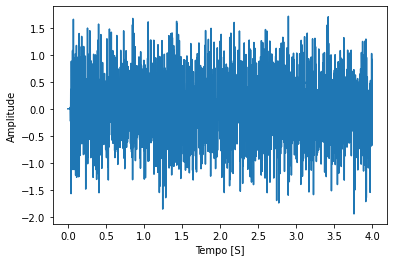

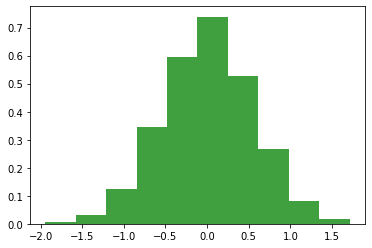

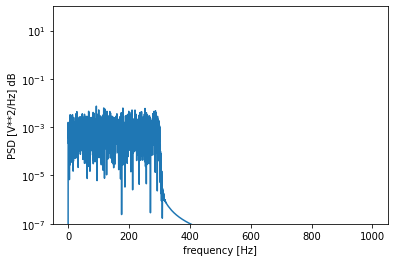

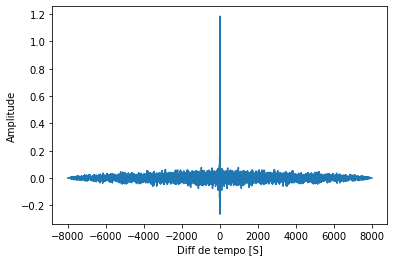

In [9]:

freq=300
amp, func=ruido()
filtro= signal.butter(100, freq, 'low', fs=fs, output='sos')

plote(str(round(amp2, 3))+'*gaussiana(0,1), lp('+str(freq)+'Hz)', signal.sosfilt(filtro, func), y=None, intervalo=intervalo, time=time)

# F- Ruído de faixa estreita (filtragem em banda estreita de y)

minha amplitude de variancia total foi 1
potencia total 0.04467520965167057



<ipython-input-4-155d22458db3>:205: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



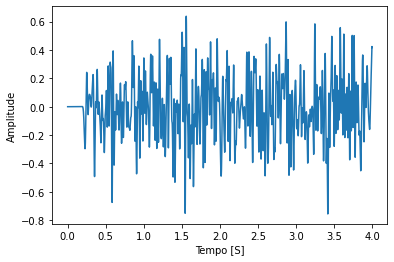

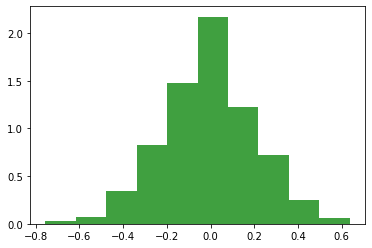

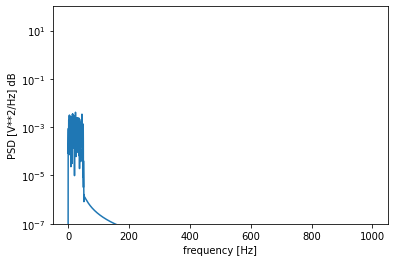

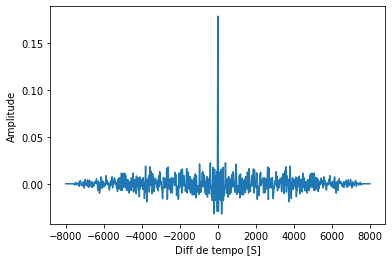

In [10]:
freq=50
amp, func=ruido()
filtro= signal.butter(100, freq, 'lp', fs=fs, output='sos')

plote(str(round(amp2, 3))+'*gaussiana(0,1), lp('+str(freq)+'Hz)', signal.sosfilt(filtro, func), y=None, intervalo=intervalo, time=time)

# (D) Análise cruzada no domínio do tempo e frequência de Processos Estocásticos(E.S.A)

minha amplitude de variancia total foi 1
minha amplitude de variancia total foi 1
potencia base 0.9908137456140675
potencia ruido 0.987359414329572
potencia total 2.006187357381481



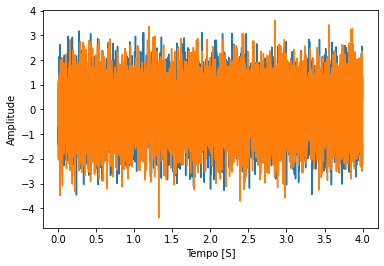

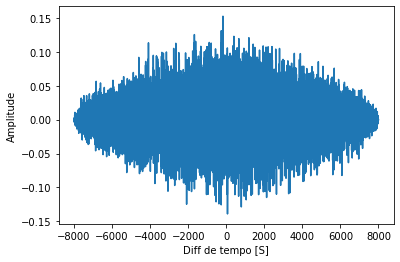

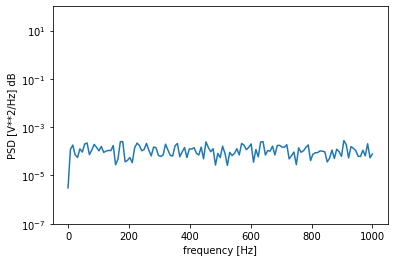

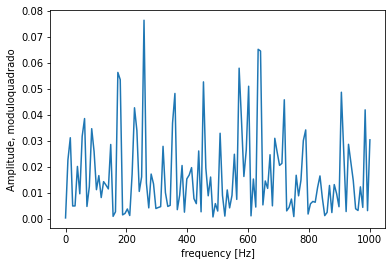

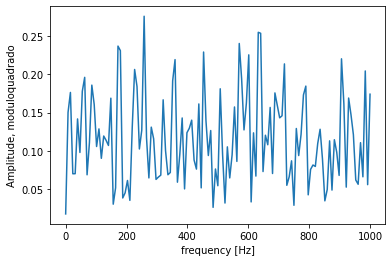

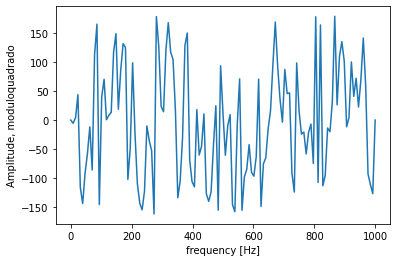

In [11]:

amp1, func1=ruido()
amp2, func2=ruido()
ampx=amp1
x=func1
ampy=amp2
y=func2
plote2(str(round(amp1, 3))+'*gaussiana(0,1) e '+str(round(amp2, 3))+'*gaussiana(0,1)', x, y)


minha amplitude total foi 2
minha amplitude total foi 1
potencia base 2.96797007599731
potencia ruido 1.481617799745514
potencia total 4.414104933359433



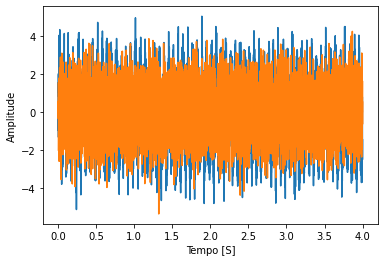

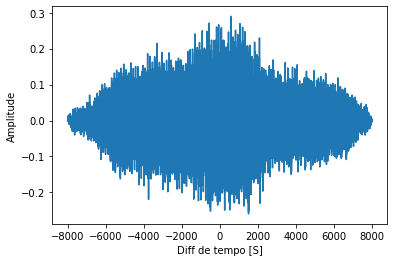

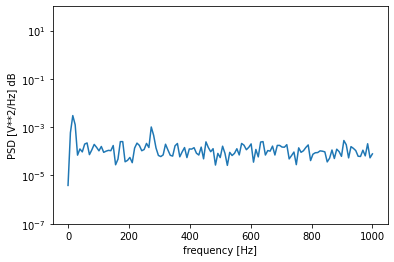

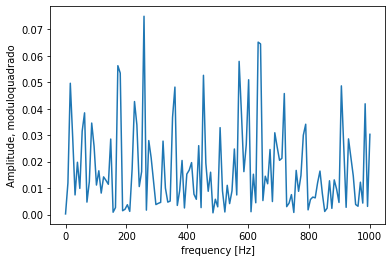

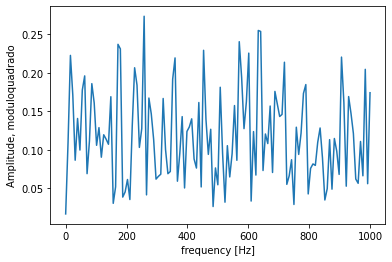

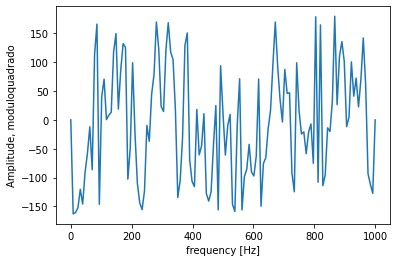

In [12]:
freq1=16
freq2=273
amp2=1
amp1=2
amp1, func1=sinal(amp1, freq1, t=time)
amp2, func2=sinal(amp2, freq2, t=time)
ampz=amp1
z=x+func1
ampw=amp2
w=y+func2

plote2(str(round(amp1, 3))+'*seno(2*pi*'+str(freq1)+'*t)'+str(round(ampx, 3))+'*gaussiana(0,1) e '+str(round(amp2, 3))+'*seno(2*pi*'+str(freq2)+'*t)'+str(round(ampy, 3))+'*gaussiana(0,1)', z, w, intervalo=intervalo, time=time)

potencia base 2.96797007599731
potencia ruido 3.4150710712987915
potencia total 10.324714535295954



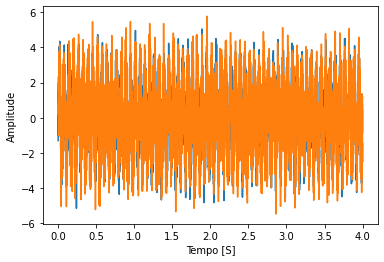

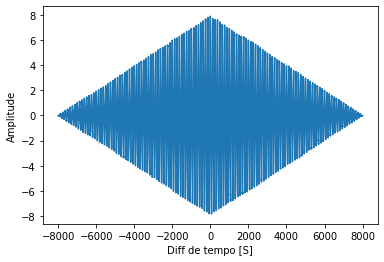

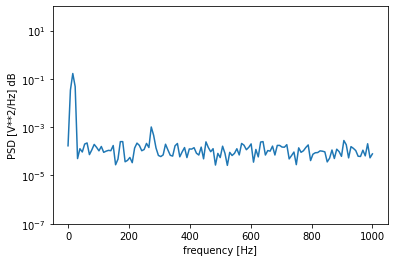

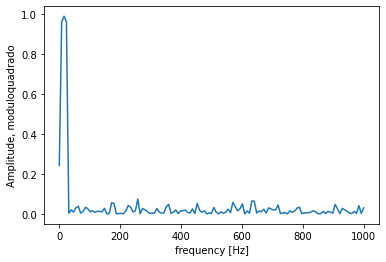

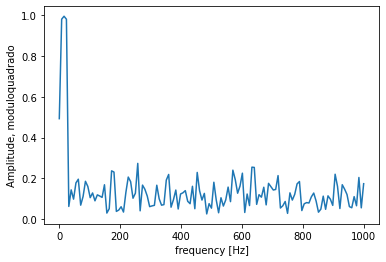

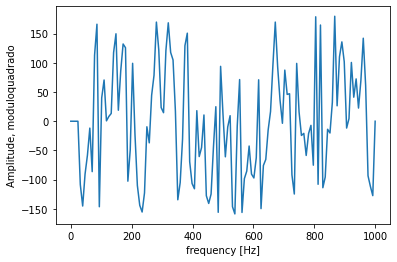

In [13]:
ampw=amp2
w=y+func2+func1

plote2(str(round(amp1, 3))+'*seno(2*pi*'+str(freq1)+'*t)'+str(round(ampx, 3))+'*gaussiana(0,1) e '+str(round(amp1, 3))+'*seno(2*pi*'+str(freq1)+'*t)'+str(round(amp2, 3))+'*seno(2*pi*'+str(freq2)+'*t)'+str(round(ampy, 3))+'*gaussiana(0,1)', z, w, intervalo=intervalo, time=time)